## Visualize collected `geospatial data` on a <span style="color:turquoise;">MAP</span>

In [4]:
import os
from dotenv import load_dotenv
load_dotenv() 
Bearer = os.getenv('Bearer')
apiurl = os.getenv('apiurl')


In [5]:
import requests
from pprint import pprint
#Define the bldg code service function
#ONU
#Enter user number
num = int(input("Please enter a number: "))
def getONU(num):
    url = f"{apiurl}/api/komp_assistant/onu/phone/{num}"

    payload = {}
    headers = {
    'Authorization': Bearer
    }

    response = requests.request("GET", url, headers=headers, data=payload)

    if response.status_code == 200:
        data = response.json()
        #pprint(data)
        bcode_value = data.get("bcode")
        bname_value = data.get("bname")
        return bcode_value, bname_value
    else:
        bcode_value = None
        return None

def getPAP(num):
    url = f"{apiurl}/api/komp_assistant/phone/{num}"

    payload = {}
    headers = {
    'Authorization': Bearer
    }

    response = requests.request("GET", url, headers=headers, data=payload)

    if response.status_code == 200:
        data = response.json()
        bcode_value = data.get("bcode")
        bname_value = data.get("bname")
        return bcode_value, bname_value
    else:
        bcode_value = None
        return None

def getbcode(num):
    try:
        bcode, bname = getPAP(num)
        if bcode == None:
            bcode, bname = getONU(num)
            if bcode == None:
                print('Bcode not found for both PAP and ONU')
                return 'Not Found'
            else:
                #print('ONU', num, bcode)
                return 'ONU', num, bcode, bname
        else:
            #print('PAP', num, bcode)
            return 'PAP', num, bcode, bname
    except Exception as e:
        print('Error: ',e)
result = getbcode(num)
print(result)
if isinstance(result, tuple):
    print("Result is a tuple")
    router, num, buildingcode, bname = result
else:
    print("Result is not a tuple")
    buildingcode = 'Not Exist'


('PAP', 706139071, 'KENRZ18020', 'Harvest')
Result is a tuple


In [6]:
%pip install folium
import zipfile
import xml.etree.ElementTree as ET
import folium

with zipfile.ZipFile('./geobank/KCIS Master Map 1011_2023.kmz', 'r') as zip_ref:
    zip_ref.extractall('./geobank/')

# Parse the .kml file
tree = ET.parse('./geobank/doc.kml')
root = tree.getroot()

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 566.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
for placemark in root.iter('{http://www.opengis.net/kml/2.2}Placemark'):
    name = placemark.find('{http://www.opengis.net/kml/2.2}name').text
    #print(name)

In [8]:
print(buildingcode)
buildingcode = str(buildingcode)
for placemark in root.iter('{http://www.opengis.net/kml/2.2}Placemark'):
    name = placemark.find('{http://www.opengis.net/kml/2.2}name').text
    #print(name)
    if buildingcode in name: 
        coordinates = placemark.find('{http://www.opengis.net/kml/2.2}Point/{http://www.opengis.net/kml/2.2}coordinates').text
        # coordinates will be a string in the format "longitude,latitude,altitude"
        # you can split it into a list of floats using:
        coordinates_list = [float(coord) for coord in coordinates.split(',')]
        print(coordinates_list)


KENRZ18020
[36.89624276060896, -1.206767622731932, 0.0]


In [9]:
longitude, latitude = coordinates_list[:2]
# Create a folium map centered around the coordinates
map_object = folium.Map(location=[latitude, longitude], zoom_start=15)

# Add a marker to the map
folium.Marker(location=[latitude, longitude], popup=f'Contact: {num}, Router Type: {router}, Building: {bname}').add_to(map_object)

# Save the map to an HTML file
map_object.save('./geobank/map.html')


In [10]:
import sqlite3
from pprint import pprint

# Connect to the SQLite database
conn = sqlite3.connect('transcriptions.db')
cursor = conn.cursor()

# Initialize an empty dictionary to store results
results_dict = {}

# Retrieve unique contact numbers from the transcriptions table
cursor.execute("SELECT DISTINCT contact FROM transcriptions WHERE contact IS NOT NULL;")
# cursor.execute("SELECT DISTINCT contact FROM transcriptions WHERE contact IS NOT NULL AND (substr(date, 1, 10) = '2023-10-28' AND issue_category = 'Router Technical Problem');")


contacts = cursor.fetchall()

# Iterate over each contact number
for contact in contacts:
    num = contact[0]

    # Use the getbcode function to get router, num, building code, and bname
    result = getbcode(num)

    if isinstance(result, tuple):
        router, num, buildingcode, bname = result
    else:
        buildingcode = 'Not Exist'

    # Store the results in the dictionary
    results_dict[num] = {
        'router': router,
        'num': num,
        'buildingcode': buildingcode,
        'bname': bname
    }

# Close the database connection
conn.close()

# Print the results dictionary
pprint(results_dict)


Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-iterable NoneType object
Error:  cannot unpack non-itera

In [11]:
import folium
from regex import B

# Initialize an empty folium map
map_object = folium.Map(location=[-1.2921, 36.8219], zoom_start=10)  # Default centre initialized Nairobi, Kenya and zoom

# Iterate over each user in the results_dict
for num, user_info in results_dict.items():
    # Extract user information
    router = user_info['router']
    buildingcode = user_info['buildingcode']
    if 'KENKH' in buildingcode:
        iconcolor = 'blue'
    elif 'KENKS' in buildingcode:
        iconcolor = 'darkblue'
    elif 'KENKM' in buildingcode:
        iconcolor = 'purple'
    elif 'KEKRK' in buildingcode:
        iconcolor = 'cadetblue'
    elif 'KENKK' in buildingcode:
        iconcolor = 'gray'
    elif 'KENRG' in buildingcode:
        iconcolor = 'black'
    elif 'KENRZ' in buildingcode:
        iconcolor = 'beige'
    elif 'KEKRG' in buildingcode:
        iconcolor = 'lightblue'
    elif 'KENRK' in buildingcode:
        iconcolor = 'green'
    elif 'KENRL' in buildingcode:
        iconcolor = 'lightgray'
    elif 'KENRR' in buildingcode:
        iconcolor = 'darkblue'
    else:
        iconcolor = 'orange'

    bname = user_info['bname']

    # Check if building code is available
    if buildingcode and ('Not Exist' not in buildingcode) and (isinstance(buildingcode, str) or isinstance(buildingcode, tuple)):
        if isinstance(buildingcode, str):
            buildingcode_list = [buildingcode]
        else:
            buildingcode_list = list(buildingcode)

        for bcode in buildingcode_list:
            # Iterate over each placemark in the KML file
            for placemark in root.iter('{http://www.opengis.net/kml/2.2}Placemark'):
                name = placemark.find('{http://www.opengis.net/kml/2.2}name').text

                # Check if the building code is in the name
                if bcode in name:
                    coordinates = placemark.find('{http://www.opengis.net/kml/2.2}Point/{http://www.opengis.net/kml/2.2}coordinates').text
                    coordinates_list = [float(coord) for coord in coordinates.split(',')]

                    # Extract latitude and longitude
                    longitude, latitude = coordinates_list[:2]

                    # Add a marker for each user to the folium map
                    folium.Marker(
                        location=[latitude, longitude],
                        popup=f'Contact: {num}, Router Type: {router}, Building: {bname}',icon=folium.Icon(color=iconcolor, icon='earphone' )
                    ).add_to(map_object)

# Save the map to an HTML file
map_object.save('./geobank/mapwithoutoutlines.html')


In [12]:
import folium
from xml.etree import ElementTree as ET

def add_polygon(map_object, coordinates, name):
    # Extract latitudes, longitudes, and altitudes from the coordinates
    latitudes = [coord[1] for coord in coordinates]
    longitudes = [coord[0] for coord in coordinates]

    # Check if there are coordinates before calculating the center
    if latitudes and longitudes:
        # Find the center of the polygon
        center_lat = sum(latitudes) / len(latitudes)
        center_lon = sum(longitudes) / len(longitudes)

        # Create a Folium polygon
        folium.Polygon(
            locations=[(lon, lat) for lon, lat, _ in coordinates],  # Use all three values (lat, lon, _)
            color='blue',
            fill=True,
            fill_color='lightblue',
            fill_opacity=0.4,
            popup=name,
            location=(center_lat, center_lon)  # Set the center of the polygon
        ).add_to(map_object)

def process_folder(folder, map_object):
    for placemark in folder.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        name = placemark.find('{http://www.opengis.net/kml/2.2}name').text
        coordinates_text = placemark.find('.//{http://www.opengis.net/kml/2.2}coordinates').text
        coordinates = [list(map(float, coord.split(','))) for coord in coordinates_text.split()]
        add_polygon(map_object, coordinates, name)

# Parse the KML file
tree = ET.parse('./geobank/doc.kml')
root = tree.getroot()

# Create a Folium map
map_object = folium.Map(location=[0, 0], zoom_start=3)

# Process top-level folders
for folder in root.findall('.//{http://www.opengis.net/kml/2.2}Folder'):
    process_folder(folder, map_object)

# Save or display the map
map_object.save('./geobank/map_with_outlines.html')


### As observed the created html file is too large to render on browser without being `CPU intensive`. 
#### Solution: 
Externalize Data: Instead of embedding all data directly into the HTML file, consider loading data dynamically from an external source (e.g., GeoJSON files) as needed. This can improve initial loading times.

In [13]:
%pip install geopandas
%pip install Fiona pyproj
%pip install osgeo
%pip install GDAL
%pip install geopy
import geopandas as gpd
from geopandas.tools import geocode
import fiona

# Enable KML driver
fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Load KML file using geopandas.tools
kml_file_path = './geobank/doc.kml'
gdf = gpd.read_file(kml_file_path, provider='ogr')

# Save GeoJSON file
geojson_file_path = './geobank/output.geojson'
gdf.to_file(geojson_file_path, driver='GeoJSON')


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/07/ea/6674320c62a688bc1dc14201dfb7d4aeaea0939a1e733b85bae39e177325/fiona-1.9.5-cp311-cp311-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 149.3 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/64/90/dfe5c00de1ca4dbb82606e79790659d4ed7f0ed8d372bccb3baca2a5abe0/pyproj-3.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/8c/47/05c8bb8322861113e72b903aebaaa4678ae6e44c886c189ad8fe297f2008/shapely-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.wh

#### Create a full geojson with nested data from KML. Execution will take time depending on your data size.

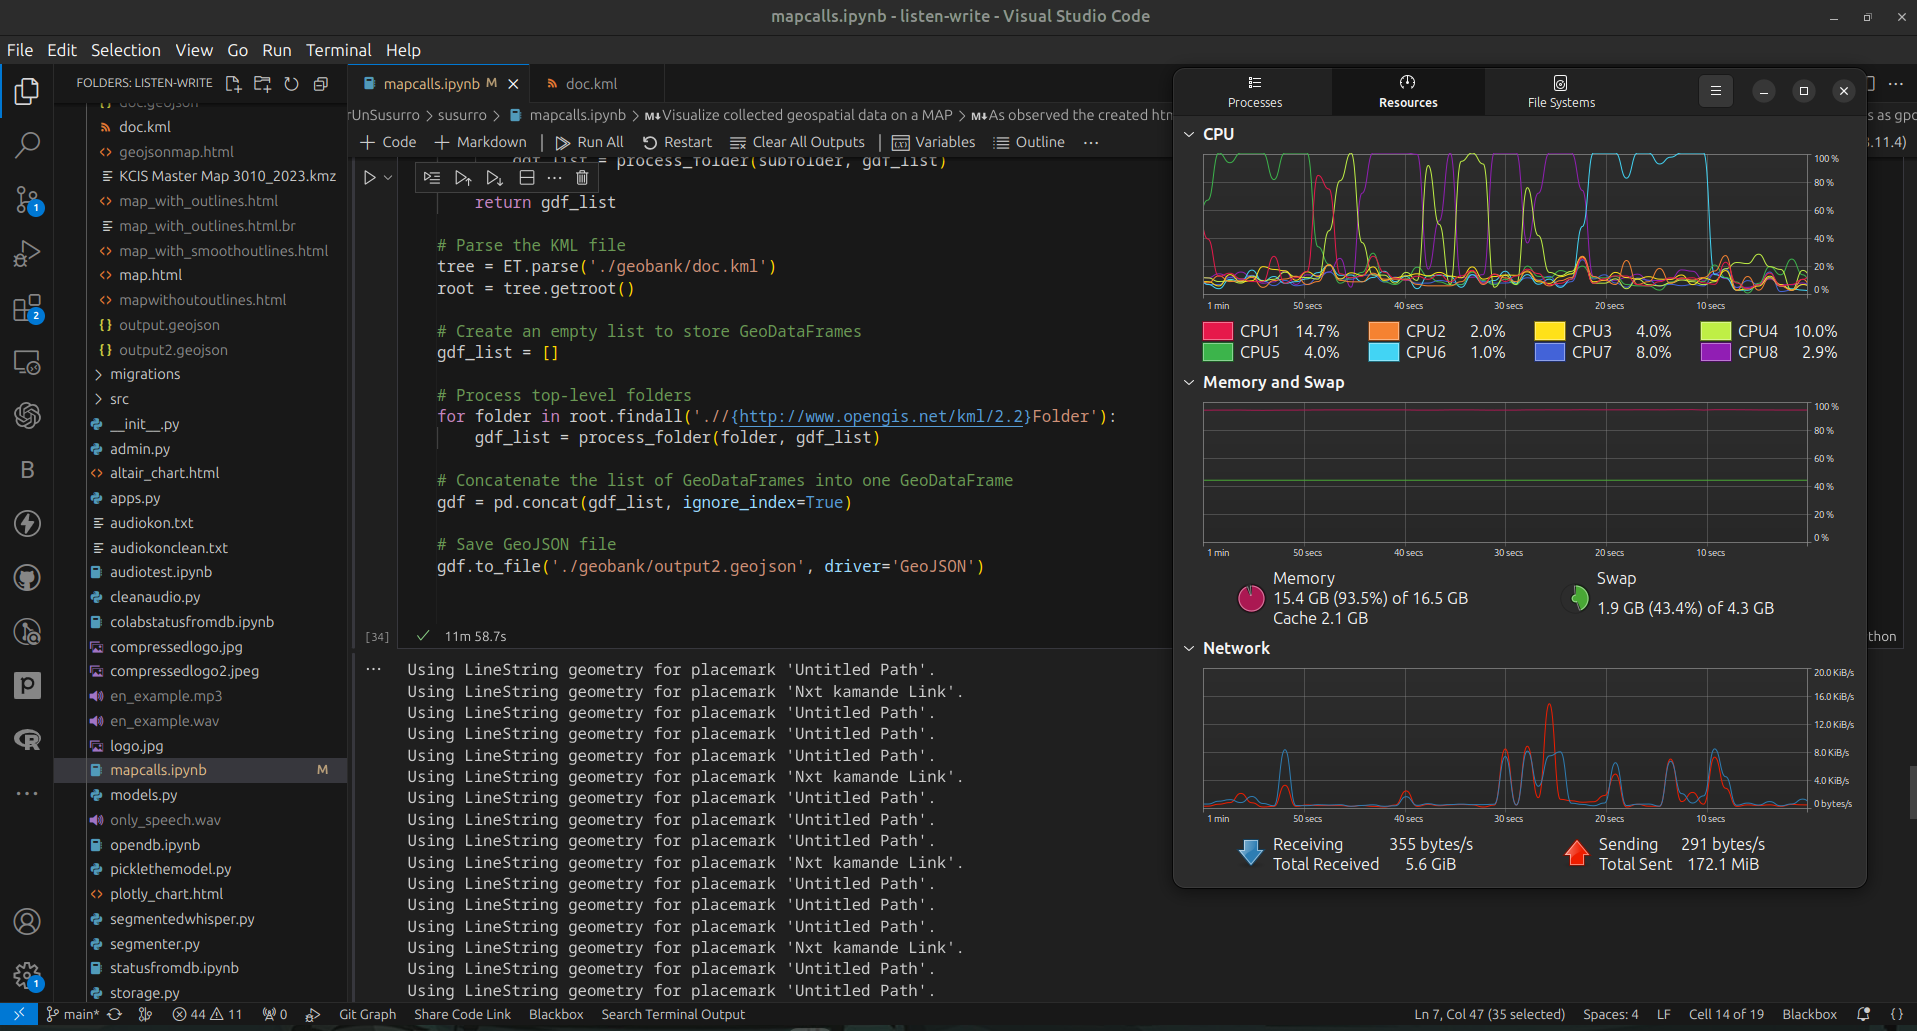

In [14]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString

def process_folder(folder, gdf_list):
    for placemark in folder.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        name = placemark.find('{http://www.opengis.net/kml/2.2}name').text
        coordinates_text = placemark.find('.//{http://www.opengis.net/kml/2.2}coordinates').text
        coordinates = [list(map(float, coord.split(','))) for coord in coordinates_text.split()]

        # Check if all coordinates have the same length
        if len(set(len(coord) for coord in coordinates)) != 1:
            print(f"Using LineString geometry for placemark '{name}'.")
            geometry = LineString([Point(coord[0], coord[1]) for coord in coordinates])
        else:
            geometry = Point(coordinates[0][0], coordinates[0][1])

        # Create a temporary GeoDataFrame with the placemark data
        gdf_temp = gpd.GeoDataFrame({'Name': [name], 'geometry': [geometry]})

        # Append it to the list of GeoDataFrames
        gdf_list.append(gdf_temp)

    for subfolder in folder.findall('.//{http://www.opengis.net/kml/2.2}Folder'):
        gdf_list = process_folder(subfolder, gdf_list)

    return gdf_list

# Parse the KML file
tree = ET.parse('./geobank/doc.kml')
root = tree.getroot()

# Create an empty list to store GeoDataFrames
gdf_list = []

# Process top-level folders
for folder in root.findall('.//{http://www.opengis.net/kml/2.2}Folder'):
    gdf_list = process_folder(folder, gdf_list)

# Concatenate the list of GeoDataFrames into one GeoDataFrame
gdf = pd.concat(gdf_list, ignore_index=True)

# Save GeoJSON file
gdf.to_file('./geobank/output2.geojson', driver='GeoJSON')



Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Nxt kamande Link'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Nxt kamande Link'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Nxt kamande Link'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Nxt kamande Link'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString geometry for placemark 'Untitled Path'.
Using LineString ge

In [15]:
import folium
import json

# Load GeoJSON data from the file
with open('./geobank/output.geojson', 'r') as f:
    geojson_data = json.load(f)

# Calculate the average latitude and longitude for the center
all_coordinates = []

for feature in geojson_data['features']:
    geometry_type = feature['geometry']['type']

    if geometry_type == 'Point':
        all_coordinates.append(feature['geometry']['coordinates'])
    elif geometry_type == 'MultiPoint':
        all_coordinates.extend(feature['geometry']['coordinates'])

avg_latitude = sum(coord[1] for coord in all_coordinates) / len(all_coordinates)
avg_longitude = sum(coord[0] for coord in all_coordinates) / len(all_coordinates)

# Create a Folium Map centered at the average latitude and longitude
map_center = [avg_latitude, avg_longitude]
mymap = folium.Map(location=map_center, zoom_start=12, control_scale=True)

# Add GeoJSON layer to the map
folium.GeoJson(geojson_data).add_to(mymap)

# Save the map as an HTML file
mymap.save("./geobank/geojsonmap.html")





In [16]:
import folium
import json

# Load GeoJSON data from the file
with open('./geobank/output2.geojson', 'r') as f:
    geojson_data = json.load(f)

# Calculate the average latitude and longitude for the center
all_coordinates = []

for feature in geojson_data['features']:
    geometry = feature.get('geometry')  # Use get to handle missing 'geometry' key
    
    if geometry and geometry['type'] == 'Point':
        all_coordinates.append(geometry['coordinates'])
    elif geometry and geometry['type'] == 'LineString':
        all_coordinates.extend(geometry['coordinates'])

avg_latitude = sum(coord[1] for coord in all_coordinates) / len(all_coordinates)
avg_longitude = sum(coord[0] for coord in all_coordinates) / len(all_coordinates)

# Create a Folium Map centered at the average latitude and longitude
map_center = [avg_latitude, avg_longitude]
mymap = folium.Map(location=map_center, zoom_start=12, control_scale=True)

# Add GeoJSON layer to the map
folium.GeoJson(geojson_data).add_to(mymap)

# Save the map as an HTML file
mymap.save("./geobank/geojsonmap2.html")



In [17]:
import geopandas as gpd
from shapely.geometry import Polygon
import xml.etree.ElementTree as ET
import pandas as pd

def process_folder(folder, gdf_list):
    for placemark in folder.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        name = placemark.find('{http://www.opengis.net/kml/2.2}name').text
        geometry = placemark.find('{http://www.opengis.net/kml/2.2}Polygon/{http://www.opengis.net/kml/2.2}outerBoundaryIs/{http://www.opengis.net/kml/2.2}LinearRing/{http://www.opengis.net/kml/2.2}coordinates')
        
        if geometry is not None:
            coordinates_text = geometry.text
            coordinates = [list(map(float, coord.split(','))) for coord in coordinates_text.split()]
            
            # Create a GeoDataFrame with the placemark data
            polygon = Polygon(coordinates)
            gdf_temp = gpd.GeoDataFrame({'Name': [name], 'geometry': [polygon]})
            gdf_list.append(gdf_temp)

    for subfolder in folder.findall('.//{http://www.opengis.net/kml/2.2}Folder'):
        gdf_list = process_folder(subfolder, gdf_list)

    return gdf_list

# Parse the KML file
tree = ET.parse('./geobank/doc.kml')
root = tree.getroot()

# Create an empty list to store GeoDataFrames
gdf_list = []

# Find the 'Network Plans' folder
network_plans_folder = root.find('.//{http://www.opengis.net/kml/2.2}Folder[{http://www.opengis.net/kml/2.2}name="Network Plans"]')

# Process the 'Network Plans' folder
gdf_list = process_folder(network_plans_folder, gdf_list)

# Concatenate the list of GeoDataFrames into one GeoDataFrame
gdf_polygons = pd.concat(gdf_list, ignore_index=True)

# Save GeoJSON file
gdf_polygons.to_file('./geobank/network_plans.geojson', driver='GeoJSON')



#### Get Pure Polygon HTML Map (Without Names)

In [18]:
import folium
import json

# Load GeoJSON data from the file
with open('./geobank/network_plans.geojson', 'r') as f:
    geojson_data = json.load(f)

# Create a Folium Map
mymap = folium.Map(location=[-1.2921, 36.8219], zoom_start=10, control_scale=True)

# Add GeoJSON layer to the map
folium.GeoJson(geojson_data).add_to(mymap)

# Save the map as an HTML file
mymap.save("./geobank/geojsonmap3.html")




#### Get Pure Polygon HTML Map (With Names)

In [19]:
import folium
import json

# Load GeoJSON data from the file
with open('./geobank/network_plans.geojson', 'r') as f:
    geojson_data = json.load(f)

# Create a Folium Map
mymap = folium.Map(location=[-1.2921, 36.8219], zoom_start=10, control_scale=True)

# Add GeoJSON layer to the map with named polygons
folium.GeoJson(
    geojson_data,
    name='geojson_layer',
    style_function=lambda feature: {
        'fillColor': 'green',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5',
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'blue'},
    tooltip=folium.GeoJsonTooltip(fields=['Name'], aliases=['Polygon Name'], labels=True, sticky=True),
).add_to(mymap)

# Save the map as an HTML file
mymap.save("./geobank/geojsonmap4.html")



## Brotli Compression

In [20]:
%pip install brotli
import brotli

with open('./geobank/map_with_outlines.html', 'rb') as input_file:
    compressed_data = brotli.compress(input_file.read())

with open('./geobank/map_with_outlines.html.br', 'wb') as output_file:
    output_file.write(compressed_data)

  Obtaining dependency information for brotli from https://files.pythonhosted.org/packages/b3/e7/ca2993c7682d8629b62630ebf0d1f3bb3d579e667ce8e7ca03a0a0576a2d/Brotli-1.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.4 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [21]:
import brotli

with open('./geobank/map_with_outlines.html.br', 'rb') as input_file:
    compressed_data = input_file.read()

decompressed_data = brotli.decompress(compressed_data)

with open('./geobank/decompressed_file.html', 'wb') as output_file:
    output_file.write(decompressed_data)

### Simplifying Polygons with `Folium.PolyLine` method's `Smooth Factor`

In [22]:
import folium
from xml.etree import ElementTree as ET

def add_polygon(map_object, coordinates, name):
    # Extract latitudes, longitudes, and altitudes from the coordinates
    longitudes = [coord[0] for coord in coordinates]
    latitudes = [coord[1] for coord in coordinates]

    # Check if there are coordinates before calculating the center
    if latitudes and longitudes:
        # Find the center of the polygon
        center_lat = sum(latitudes) / len(latitudes)
        center_lon = sum(longitudes) / len(longitudes)

        # Create a Folium polyline with a smooth factor
        folium.PolyLine(
            locations=[(lat, lon) for lon, lat, _ in coordinates],  # Adjust the order here
            color='blue',
            weight=2,
            smooth_factor=0.5,  # Adjust the smooth factor (0.0 to 1.0)
            popup=name,
        ).add_to(map_object)
def process_folder(folder, map_object):
    for placemark in folder.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        name = placemark.find('{http://www.opengis.net/kml/2.2}name').text
        coordinates_text = placemark.find('.//{http://www.opengis.net/kml/2.2}coordinates').text
        coordinates = [list(map(float, coord.split(','))) for coord in coordinates_text.split()]
        add_polygon(map_object, coordinates, name)

# Parse the KML file
tree = ET.parse('./geobank/doc.kml')
root = tree.getroot()

# Create a Folium map
map_object = folium.Map(location=[0, 0], zoom_start=3)

# Process top-level folders
for folder in root.findall('.//{http://www.opengis.net/kml/2.2}Folder'):
    process_folder(folder, map_object)

# Save or display the map
map_object.save('./geobank/map_with_smoothoutlines.html')

In [23]:
import xml.etree.ElementTree as ET

def list_folders(kml_file):
    tree = ET.parse(kml_file)
    root = tree.getroot()

    folders = []

    for folder in root.findall('.//{http://www.opengis.net/kml/2.2}Folder'):
        folder_name = folder.find('{http://www.opengis.net/kml/2.2}name').text
        folders.append(folder_name)

    return folders

# Replace 'your_file.kml' with the path to your KML file
kml_file_path = './geobank/doc.kml'
folders = list_folders(kml_file_path)

print("Folders:")
for folder in folders:
    print(folder)


Folders:
KCIS Master Map 1011_2023.kmz
KCIS Building Codes
STN Building Codes
Zone 1
Zone 2
Zone 3
Zone 4
Zone 5
Zone 6
Zone 7
HTR Building Codes
Zone 1
Zone 2
Zone 3
Zone 4
Zone 5
Zone 6
Zone 7
ZMM Building Codes
Zone 1
Zone 2
Zone 3
Zone 4
Zone 5
Zone 6
Zone 7
Zone 8
Zone 9
Zone 10
Zone 11
Zone 12
Zone 13
Zone 14
Zone 15
Zone 16
Zone 17
Zone 18
G44 Building Codes
Zone 1
Zone 2
Zone 3
Zone 4
Zone 5
Zone 6
Zone 7
Zone 8
Zone 9
Zone 10
Zone 11
Zone 12
Zone 13
Zone 14
Zone 15
Zone 16
Zone 17
Zone 18
G45S Building Codes
Zone 1
Zone 2
Zone 3
Zone 4
Zone 5
Zone 6
Zone 7
Zone 8
Zone 9
Zone 10
Zone 11
Zone 12
Zone 13
Zone 14
Zone 15
G45N Building Codes
Zone 16
Zone 17
Zone 18
Zone 19
Zone 20
Zone 21
Zone 22
Zone 23
Zone 24
Zone 25
Zone 26
Zone 27
Zone 28
Zone 29
Zone 30
Zone 31
Zone 32
Zone 33
Zone 34
Zone 35
Zone 36
Zone 37
Zone 38
Zone 39
Zone 40
Zone 41
Zone 43
Zone 44
KWT Building Codes
Zone 2
Zone 21
Zone 22
Zone 23
Zone 24
Zone 25
Zone 26
Zone 27
Zone 28
Zone 29
Zone 30
Zone 31
Zone 32


#### Create a buildings Geojson

In [24]:
import xml.etree.ElementTree as ET
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

def extract_placemark_data(placemark):
    name = placemark.find('.//{http://www.opengis.net/kml/2.2}name').text
    coordinates = placemark.find('.//{http://www.opengis.net/kml/2.2}coordinates').text
    coords = coordinates.strip().split(',')
    if len(coords) >= 2:
        lon, lat = map(float, coords[:2])
        return {'name': name, 'geometry': Point(lon, lat)}
    else:
        # Handle the case where there are not enough coordinates
        return None

    return {'name': name, 'geometry': Point(lon, lat)}

def process_folder(folder, gdf):
    for placemark in folder.findall('.//{http://www.opengis.net/kml/2.2}Placemark'):
        data = extract_placemark_data(placemark)
        if data:
            new_row = gpd.GeoDataFrame(data, index=[0], geometry=[data['geometry']])
            gdf = pd.concat([gdf, new_row], ignore_index=True)
            
    for subfolder in folder.findall('.//{http://www.opengis.net/kml/2.2}Folder'):
        gdf = process_folder(subfolder, gdf)

    return gdf

def create_geojson_from_kml(kml_path, output_geojson_path):
    tree = ET.parse(kml_path)
    root = tree.getroot()

    gdf = gpd.GeoDataFrame(columns=['name', 'geometry'])

    # Find and process the 'KCIS Cabled and Signed Buildings' folder
    folder = root.find('.//{http://www.opengis.net/kml/2.2}Folder[{http://www.opengis.net/kml/2.2}name="KCIS Cabled and Signed Buildings"]')
    
    if folder:
        gdf = process_folder(folder, gdf)

        # Save GeoJSON file
        gdf.to_file(output_geojson_path, driver='GeoJSON')

# Replace 'path/to/your.kml' and 'path/to/output.geojson' with your actual paths
create_geojson_from_kml('./geobank/doc.kml', './geobank/buildings.geojson')


##### Create Map from buildings.geojson

In [25]:
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster

# Load the GeoJSON file containing building data
buildings_geojson = "./geobank/buildings.geojson"
buildings_gdf = gpd.read_file(buildings_geojson)

# Create a Folium map centered at the average location of buildings
avg_latitude = buildings_gdf['geometry'].centroid.y.mean()
avg_longitude = buildings_gdf['geometry'].centroid.x.mean()
mymap = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=14)

# Add GeoJSON layer for building polygons
folium.GeoJson(buildings_geojson, name="Buildings").add_to(mymap)

# Add markers for each building
marker_cluster = MarkerCluster().add_to(mymap)

# Loop through each building and add a marker
for index, row in buildings_gdf.iterrows():
    name = row['name']
    lat, lon = row['geometry'].y, row['geometry'].x
    popup = folium.Popup(name, parse_html=True)
    folium.Marker([lat, lon], popup=popup).add_to(marker_cluster)

# Save the map as an HTML file
mymap.save("./geobank/map_with_buildings.html")


/tmp/ipykernel_20070/3243505021.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avg_latitude = buildings_gdf['geometry'].centroid.y.mean()
/tmp/ipykernel_20070/3243505021.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avg_longitude = buildings_gdf['geometry'].centroid.x.mean()


In [34]:
import folium
import geopandas as gpd

# Load the GeoJSON file containing building data
buildings_geojson = "./geobank/buildings.geojson"
buildings_gdf = gpd.read_file(buildings_geojson)

# Create a Folium map centered at the average location of buildings
avg_latitude = buildings_gdf['geometry'].centroid.y.mean()
avg_longitude = buildings_gdf['geometry'].centroid.x.mean()
mymap = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=14)

# Add GeoJSON layer for building polygons
#folium.GeoJson(buildings_geojson, name="Buildings").add_to(mymap)

# Add small circle markers for each building
for index, row in buildings_gdf.iterrows():
    name = row['name']
    lat, lon = row['geometry'].y, row['geometry'].x
    if name != "Untitled Path":
        folium.Circle(location=[lat, lon], radius=5, color='grey', fill=True, fill_color='blue', popup=name).add_to(mymap)

# Save the map as an HTML file
mymap.save("./geobank/map_with_buildings_circles.html")

/tmp/ipykernel_20070/3162412783.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avg_latitude = buildings_gdf['geometry'].centroid.y.mean()
/tmp/ipykernel_20070/3162412783.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avg_longitude = buildings_gdf['geometry'].centroid.x.mean()


In [32]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Load the GeoJSON file containing building data
buildings_geojson = "./geobank/buildings.geojson"
buildings_gdf = gpd.read_file(buildings_geojson)

# Create a Folium map centered at the average location of buildings
avg_latitude = buildings_gdf['geometry'].centroid.y.mean()
avg_longitude = buildings_gdf['geometry'].centroid.x.mean()
mymap = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=14)

# Create a MarkerCluster for building markers
marker_cluster = MarkerCluster().add_to(mymap)

# Add small circle markers with text for each building to the MarkerCluster
for index, row in buildings_gdf.iterrows():
    name = row['name']
    lat, lon = row['geometry'].y, row['geometry'].x
    if name != "Untitled Path":
        folium.Circle(location=[lat, lon], radius=5, color='blue', fill=True, fill_color='blue', popup=name).add_to(marker_cluster)

# Save the map as an HTML file
mymap.save("./geobank/map_with_buildings_circles_clustered.html")


/tmp/ipykernel_20070/885261819.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avg_latitude = buildings_gdf['geometry'].centroid.y.mean()
/tmp/ipykernel_20070/885261819.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  avg_longitude = buildings_gdf['geometry'].centroid.x.mean()
